In this part, I focused on fine-tuning the XGBoost, Random Forest and Gradient Boosting models, one of the top-performing models from my earlier evaluations, to optimize its predictive performance. Here’s a detailed look at my approach:

1. **Data Preparation**:
   - The dataset is loaded and any missing values are forward-filled to maintain data integrity.
   - The dataset is then split into features and target (salary), with subsequent division into training and testing sets. This ensures a valid evaluation of model performance on unseen data.
   - Feature scaling is applied to normalize the data, which is important for models that are sensitive to the scale of input data like XGBoost.

2. **Model Setup and Grid Search**:
   - An XGBoost regressor is initialized with its objective set to minimize squared errors.
   - A grid of hyperparameters is defined, including depth of trees, learning rate, gamma (regularization), subsample, and colsample_bytree rates. These parameters control various aspects of the model's learning process and complexity.
   - GridSearchCV is employed to exhaustively search through the parameter grid, using cross-validation to ensure the model's generalizability. The model is evaluated based on the negative mean squared error to identify the combination of parameters that minimizes prediction errors.

3. **Model Training and Evaluation**:
   - The training process is executed, and the best parameters are identified and reported along with the corresponding MSE scores for all parameter combinations.
   - The best model from the grid search is then used to make predictions on the test dataset, and various performance metrics (MSE, RMSE, MAE, R-squared) are calculated to evaluate the optimized model.

4. **Result Visualization**:
   - A scatter plot comparing the actual vs. predicted salaries is created to visually assess the accuracy of the model. The line of perfect prediction (diagonal line) provides a reference to gauge the model's predictive alignment.

Training the model with GridSearchCV...
Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Training finished.
Best parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9}
Lowest MSE: 2664069.0093654715

Results for each parameter combination:
Mean MSE: 6120139.5774658695, Standard Deviation: 1232663.9742138928 with Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.7}
Mean MSE: 6059771.610610679, Standard Deviation: 1197498.597256727 with Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.8}
Mean MSE: 6025998.018387728, Standard Deviation: 1194329.7291121094 with Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.9}
Mean MSE: 5801085.4835536145, Standard Deviation: 1249900.7759804481 with Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_de

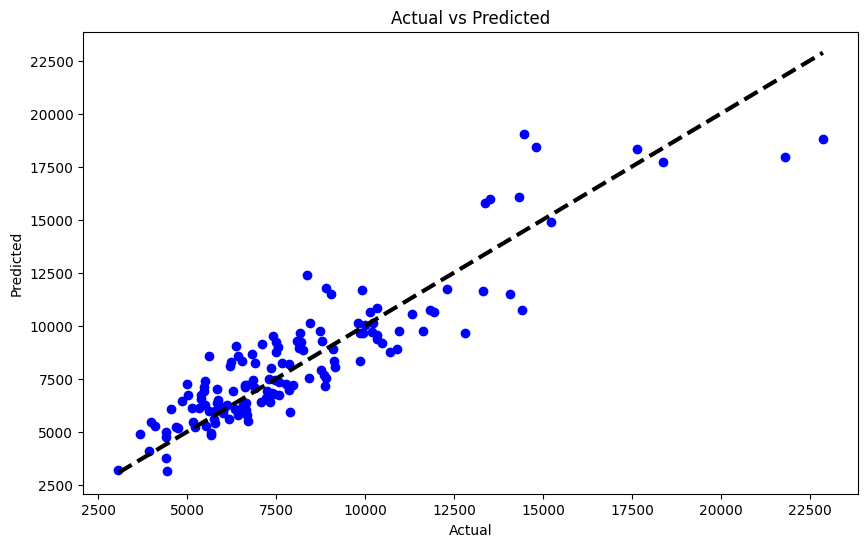

In [2]:
'''xgboost parameter optimization using GridSearchCV'''
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('/Users/a1234/Desktop/workspace/Employment_Analysis_and_Recommendation_System_Based_on_NLP_and_Data_Modeling/data/processed_wage_sample_data.csv')
data.ffill(inplace=True)  # Fill missing values forward

# Assuming 'Salary' is the target and the rest are features
X = data.drop('Salary', axis=1)
y = data['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)

# Train the model
print("Training the model with GridSearchCV...")
grid_search.fit(X_train_scaled, y_train)
print("Training finished.")

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Lowest MSE:", -grid_search.best_score_)

# Print results for each parameter combination
print("\nResults for each parameter combination:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print(f'Mean MSE: {-mean}, Standard Deviation: {std} with Parameters: {params}')

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_scaled)

# Evaluate the optimized model
optimized_mse = mean_squared_error(y_test, y_pred_optimized)
optimized_rmse = np.sqrt(optimized_mse)
optimized_mae = mean_absolute_error(y_test, y_pred_optimized)
optimized_r2 = r2_score(y_test, y_pred_optimized)
print(f'\nOptimized XGBoost MSE: {optimized_mse}')
print(f'Optimized XGBoost RMSE: {optimized_rmse}')
print(f'Optimized XGBoost MAE: {optimized_mae}')
print(f'Optimized XGBoost R-squared: {optimized_r2}')

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Mean Squared Error: 2386062.800563739
Random Forest Root Mean Squared Error: 1544.6885772102216
Random Forest Mean Absolute Error: 1156.5520687918868
Random Forest R-squared: 0.7852748647698514


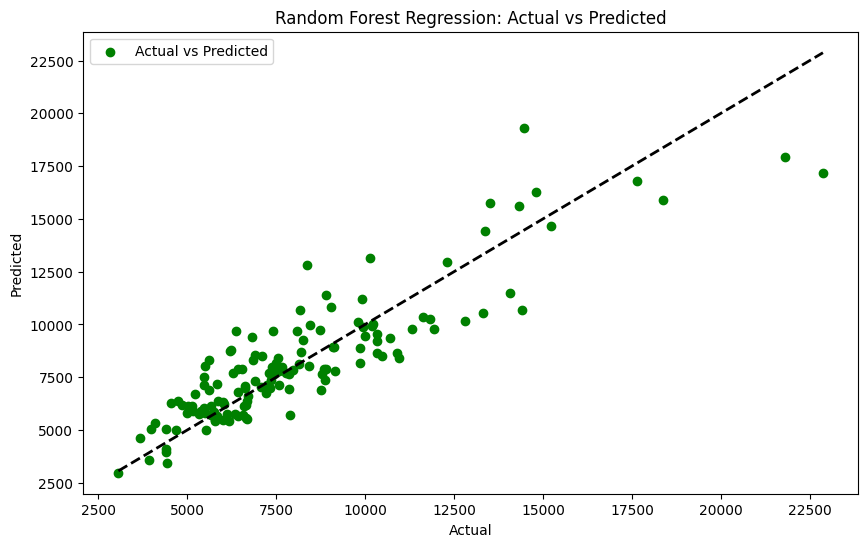

In [5]:
'''Random Forest parameter optimization using GridSearchCV'''
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# data loading, preprocessing, and train-test split as per previous steps

# Define the model
rf = RandomForestRegressor(random_state=42)

# Parameters to test in the grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)  # Assuming non-scaled data as it's not necessary for Random Forest

# Best model
best_rf = grid_search.best_estimator_

# Predictions
rf_y_pred = best_rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r_squared = r2_score(y_test, rf_y_pred)

# Output results
print(f'Random Forest Best Parameters: {grid_search.best_params_}')
print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest Root Mean Squared Error: {rf_rmse}')
print(f'Random Forest Mean Absolute Error: {rf_mae}')
print(f'Random Forest R-squared: {rf_r_squared}')

# Plot actual vs predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, color='green', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Gradient Boosting Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Gradient Boosting Mean Squared Error: 2274324.7430068213
Gradient Boosting Root Mean Squared Error: 1508.0864507735694
Gradient Boosting Mean Absolute Error: 1143.928474971262
Gradient Boosting R-squared: 0.7953303291581293


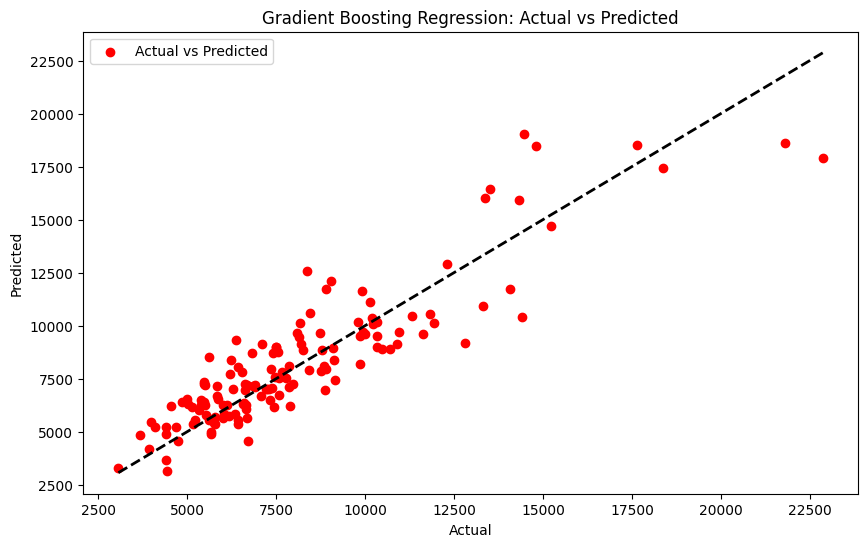

In [7]:
'''Gradient Boosting'''
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# data loading, preprocessing, and train-test split as per previous steps

# Define the model
gb = GradientBoostingRegressor(random_state=42)

# Parameters for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],  # number of boosting stages to perform
    'learning_rate': [0.01, 0.1, 0.2],  # rate at which the model learns
    'max_depth': [3, 5, 10],  # maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # minimum number of samples required to be at a leaf node
}

# Setup the GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)  # Note: Not using scaled data as it's unnecessary for Gradient Boosting

# Extract the best estimator
best_gb = grid_search.best_estimator_

# Make predictions using the best model
gb_y_pred = best_gb.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r_squared = r2_score(y_test, gb_y_pred)

# Output the performance metrics
print(f'Gradient Boosting Best Parameters: {grid_search.best_params_}')
print(f'Gradient Boosting Mean Squared Error: {gb_mse}')
print(f'Gradient Boosting Root Mean Squared Error: {gb_rmse}')
print(f'Gradient Boosting Mean Absolute Error: {gb_mae}')
print(f'Gradient Boosting R-squared: {gb_r_squared}')

# Plot actual vs predicted for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred, color='red', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression: Actual vs Predicted')
plt.legend()
plt.show()
